In [1]:
# dependencies
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import re

In [2]:
!ls /mnt/c/users/jason/documents/fed_papers

1.txt  2_jay.txt  3_jay.txt  4_jay.txt	5_jay.txt


In [3]:
WORK_DIR = '/mnt/c/users/jason/documents/fed_papers'
len(os.listdir(WORK_DIR))

5

In [4]:
words = {}
def extract(words):
    for file in os.listdir(WORK_DIR):
        paper = open(f'{WORK_DIR}/{file}')
        for line in paper.readlines():
            for word in line.split():
                lower = word.lower()
                cleaned = re.sub(r'[^\w\s]','',lower)
                if cleaned in words:
                    words[cleaned] += 1
                else:
                    words[cleaned] = 1
        paper.close()
    return words
extract(words)

words_ordered = dict(sorted(words.items(), key=lambda item: item[1], reverse=True))

Text(0, 0.5, 'Frequency (log scale)')

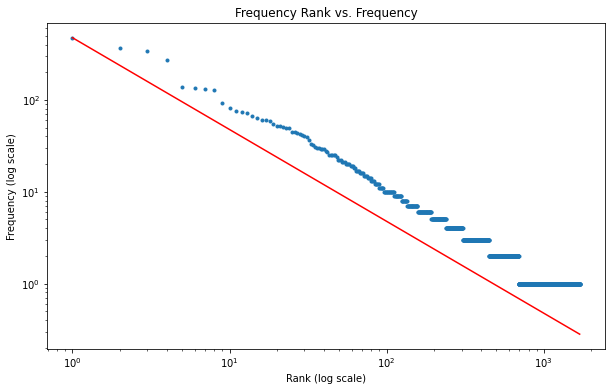

In [20]:
rank = np.arange(1, len(words_ordered) + 1)
frequency = list(words_ordered.values())
inital = max(frequency)

alpha = 1
beta = 0

zipf = [inital/(r+beta)**alpha for r in rank]

plt.figure(figsize=(10, 6))
plt.loglog(rank, frequency, marker='.', linestyle='', label="Frequency Rank vs. Frequency")
plt.loglog(rank, zipf, label="Zipf Distribution", color='red')
plt.title("Frequency Rank vs. Frequency")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")

In [6]:
df = pd.DataFrame(words_ordered.items(), columns=['Word', 'Instances'])

In [7]:
df

,Word,Instances
0,the,476
1,of,371
2,and,345
3,to,274
4,in,137
...,...,...
1688,allies,1
1689,innovations,1
1690,character,1
1691,introduce,1
